In [1]:
import pandas as pd
import numpy as np  
import sys

## 1. Import des librairies

Importation des librairies nécessaires pour l’analyse des données, la visualisation et la modélisation.

# Analyse du churn client

Ce notebook présente une analyse complète du churn client à partir d’un jeu de données réel. L’objectif est d’identifier les causes principales du churn, de modéliser le risque de départ des clients, et de proposer des recommandations opérationnelles pour améliorer la fidélisation.

**Plan du notebook :**
1. Import des librairies
2. Chargement et exploration des données
3. Visualisations et analyses descriptives
4. Feature engineering
5. Préparation des données et modélisation
6. Interprétation des résultats
7. Recommandations et actions ciblées

In [2]:
df = pd.read_excel("../data/Dataset_Clients_Churn.xlsx")

## 2. Chargement et première exploration des données

Chargement du jeu de données clients et première visualisation pour vérifier la structure et le contenu.

In [3]:
df

,CustomerID,Age,Tenure,MonthlySpend,ContractType,SupportTickets,InternetService,Gender,Churn
0,54f900cb-4467-43e6-a312-11ae20a0bad4,61,47,189.42,One year,4,None,Male,0
1,0ac5a407-770a-4795-865d-7622cdf75844,23,54,108.80,Two year,3,None,Female,0
2,8f6ae65c-43b5-41f7-9fbb-ac7d437c2d2a,26,24,119.38,Month-to-month,8,None,Male,0
3,91371991-5765-470b-ba39-ad9e749c227b,53,12,84.99,One year,1,None,Female,1
4,a620fc17-a24a-401e-88dc-24baec199530,48,14,103.19,Two year,9,DSL,Female,1
...,...,...,...,...,...,...,...,...,...
995,6b392937-3d1a-4955-ac3c-a1f57595ce50,34,40,137.47,Month-to-month,7,Fiber optic,Male,0
996,63d8fe1a-1bd9-4243-bf11-3bd05e01e1a0,33,49,104.06,One year,5,DSL,Female,1
997,27f2d955-aadf-4655-87fa-e839770e5aae,36,54,59.73,Two year,5,DSL,Male,0
998,881e5ad8-7858-4fce-92d3-bb6beb313b4b,51,24,169.77,Two year,0,Fiber optic,Male,1


In [4]:
# Informations générales sur le dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Age              1000 non-null   int64  
 2   Tenure           1000 non-null   int64  
 3   MonthlySpend     1000 non-null   float64
 4   ContractType     1000 non-null   object 
 5   SupportTickets   1000 non-null   int64  
 6   InternetService  1000 non-null   object 
 7   Gender           1000 non-null   object 
 8   Churn            1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None


### Exploration statistique et vérification des valeurs manquantes

Analyse des informations générales du dataset, statistiques descriptives et recherche de valeurs manquantes.

In [5]:

# Statistiques descriptives pour les variables numériques
df.describe()


,Age,Tenure,MonthlySpend,SupportTickets,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.793000,30.063000,103.394180,5.173000,0.207000
std,15.253748,17.597235,54.968444,3.112999,0.405358
min,18.000000,1.000000,10.110000,0.000000,0.000000
25%,32.000000,15.000000,55.377500,2.000000,0.000000
50%,45.000000,29.000000,101.160000,5.000000,0.000000
75%,58.000000,46.000000,152.255000,8.000000,0.000000
max,70.000000,60.000000,199.930000,10.000000,1.000000


In [6]:

# Vérification des valeurs manquantes
df.isnull().sum()


CustomerID         0
Age                0
Tenure             0
MonthlySpend       0
ContractType       0
SupportTickets     0
InternetService    0
Gender             0
Churn              0
dtype: int64

In [7]:

# Répartition des classes de la variable cible 'Churn'
print(df['Churn'].value_counts())

0    793
1    207
Name: Churn, dtype: int64


### Analyse de la variable cible 'Churn'

Étude de la répartition de la variable cible (churn vs non-churn) pour comprendre le déséquilibre éventuel des classes.

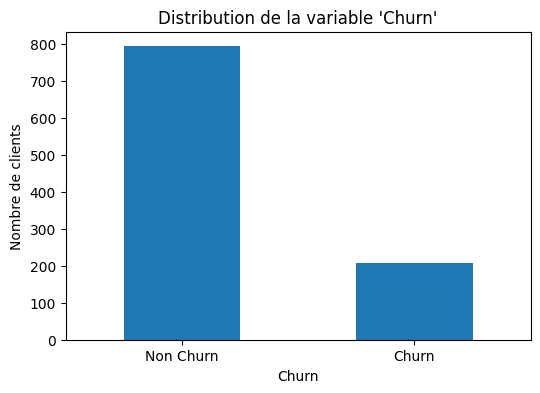

In [13]:
# Affichage de la distribution de la variable cible 'Churn'
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar')
plt.title("Distribution de la variable 'Churn'")
plt.xlabel('Churn')
plt.ylabel('Nombre de clients')
plt.xticks([0, 1], ['Non Churn', 'Churn'], rotation=0)
plt.show()

<Figure size 800x600 with 0 Axes>

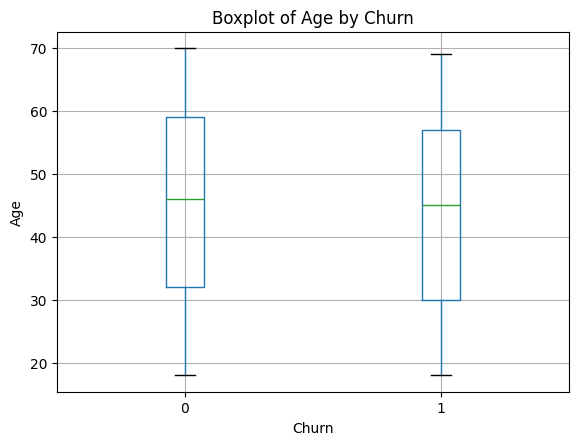

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Churn')
plt.title('Boxplot of Age by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

### Visualisations univariées : variables numériques

Analyse visuelle de la distribution des variables numériques selon le churn (boxplots).

<Figure size 800x600 with 0 Axes>

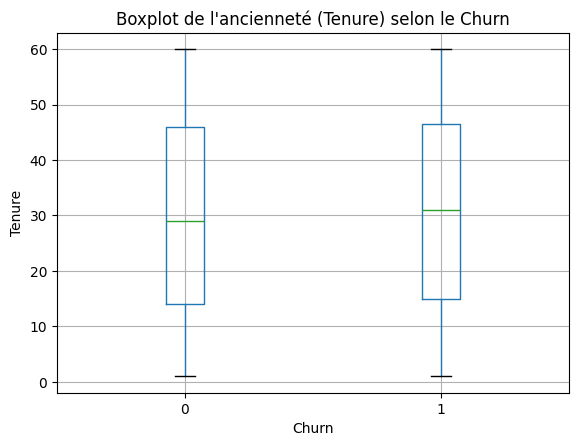

In [9]:
# Analyse de la relation entre la durée d'ancienneté (Tenure) et le churn
plt.figure(figsize=(8, 6))
df.boxplot(column='Tenure', by='Churn')
plt.title("Boxplot de l'ancienneté (Tenure) selon le Churn")
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel("Tenure")
plt.show()

<Figure size 800x600 with 0 Axes>

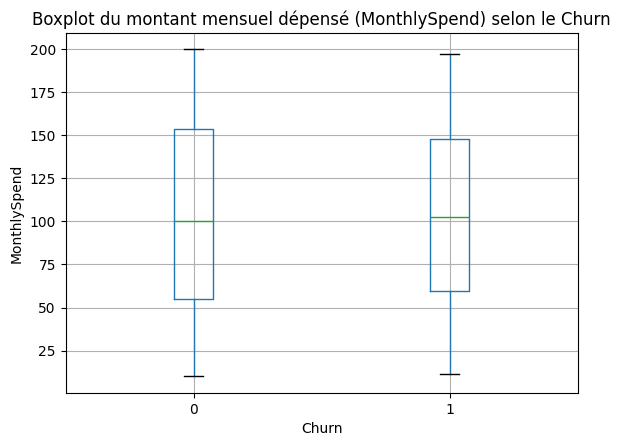

In [10]:
# Analyse de la relation entre le montant mensuel dépensé (MonthlySpend) et le churn
plt.figure(figsize=(8, 6))
df.boxplot(column='MonthlySpend', by='Churn')
plt.title("Boxplot du montant mensuel dépensé (MonthlySpend) selon le Churn")
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('MonthlySpend')
plt.show()

<Figure size 800x600 with 0 Axes>

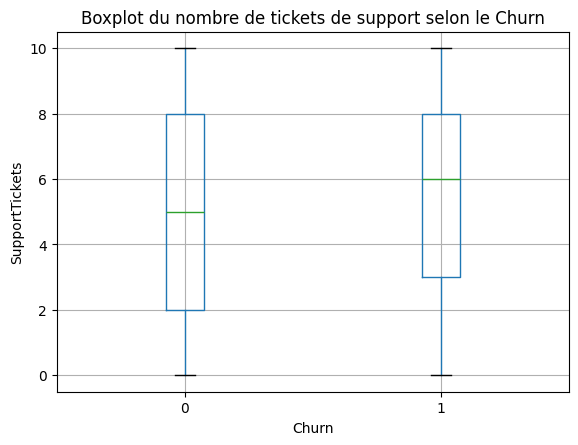

In [11]:
# Analyse de la relation entre le nombre de tickets de support et le churn
plt.figure(figsize=(8, 6))
df.boxplot(column='SupportTickets', by='Churn')
plt.title("Boxplot du nombre de tickets de support selon le Churn")
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('SupportTickets')
plt.show()

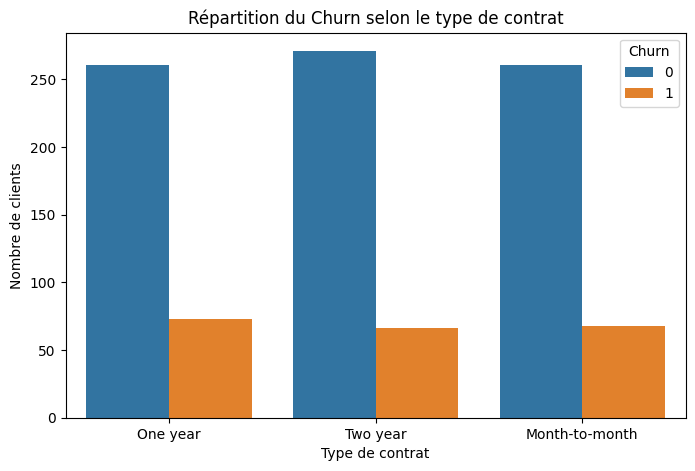

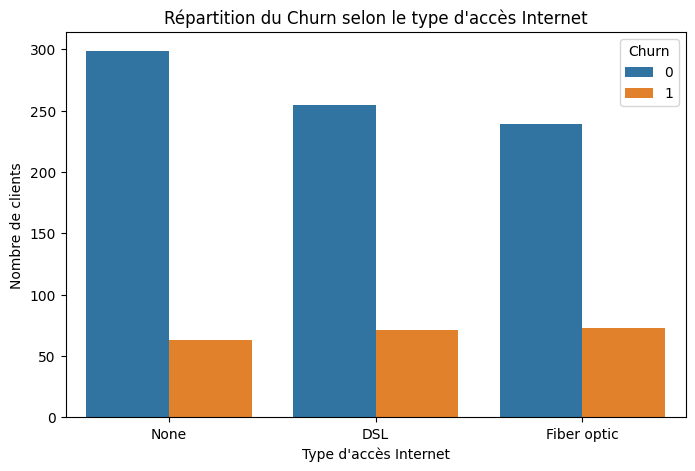

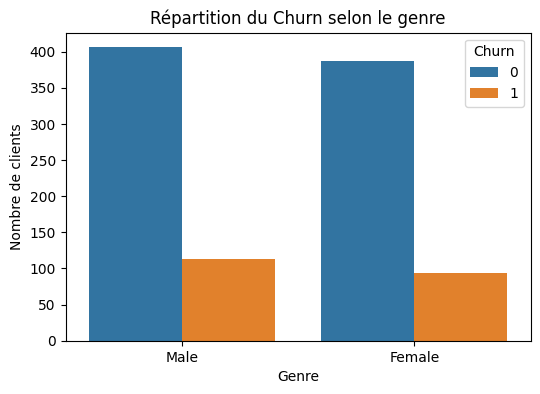

In [12]:
import seaborn as sns

# Analyse bi-variée : Croisement de variables catégorielles avec la variable cible 'Churn'

# Croisement entre 'ContractType' et 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ContractType', hue='Churn')
plt.title("Répartition du Churn selon le type de contrat")
plt.xlabel("Type de contrat")
plt.ylabel("Nombre de clients")
plt.show()

# Croisement entre 'InternetService' et 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Répartition du Churn selon le type d'accès Internet")
plt.xlabel("Type d'accès Internet")
plt.ylabel("Nombre de clients")
plt.show()

# Croisement entre 'Gender' et 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title("Répartition du Churn selon le genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de clients")
plt.show()

### Analyses bi-variées : variables catégorielles et churn

Étude de la relation entre les variables catégorielles (type de contrat, service internet, genre) et la variable cible Churn.

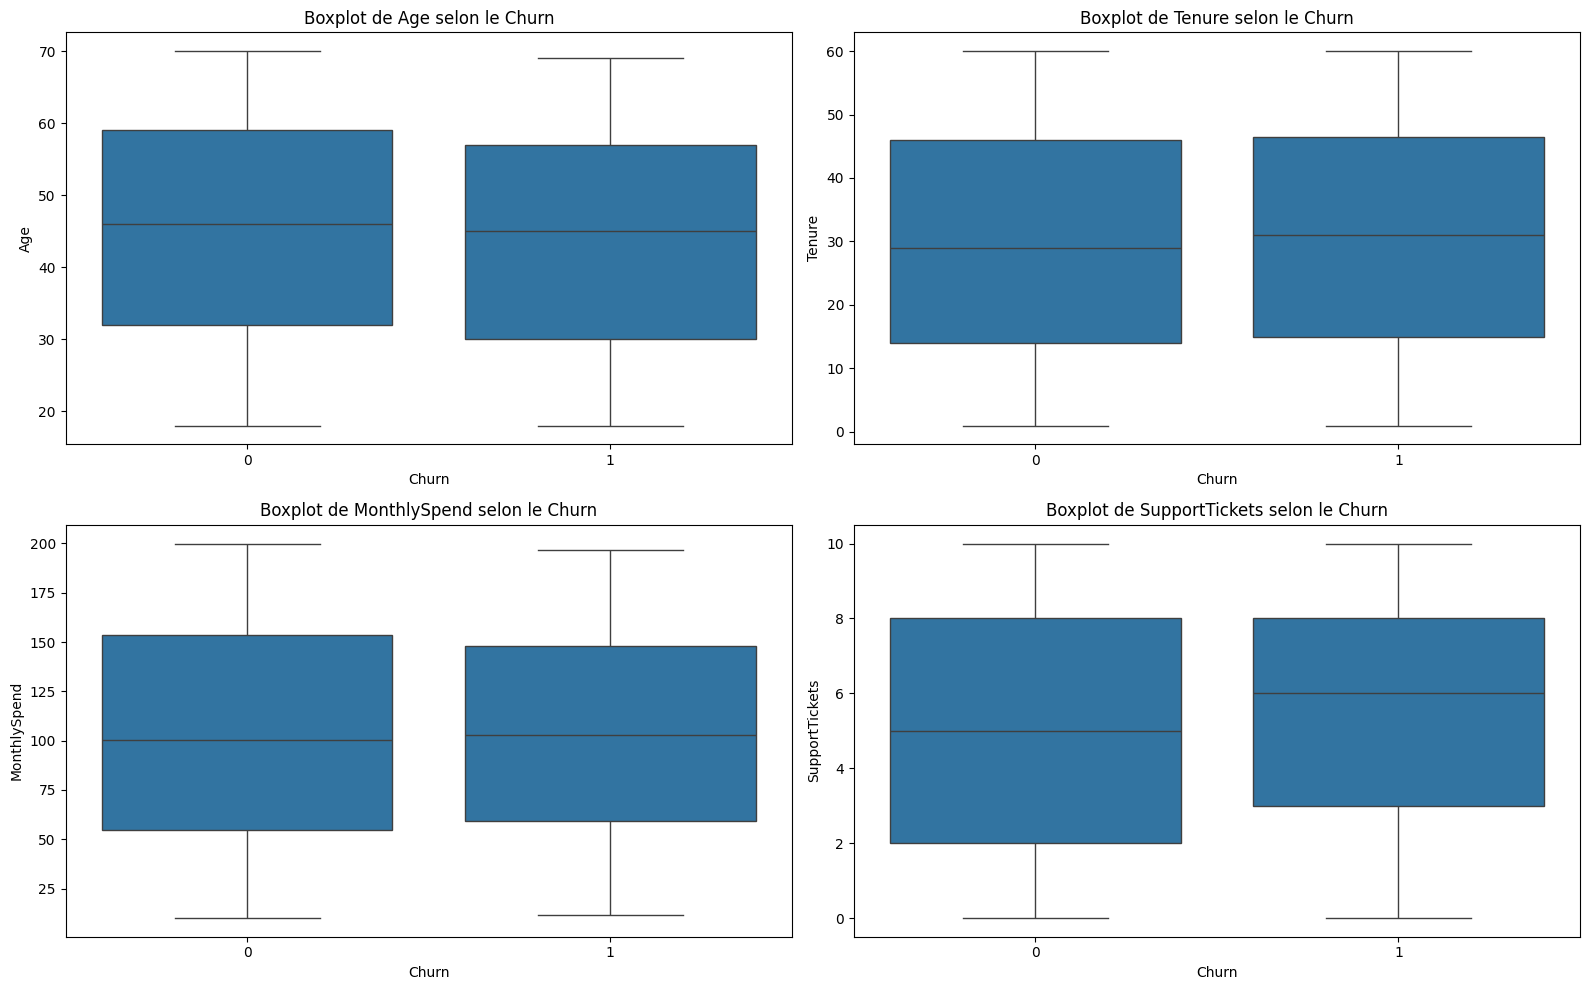

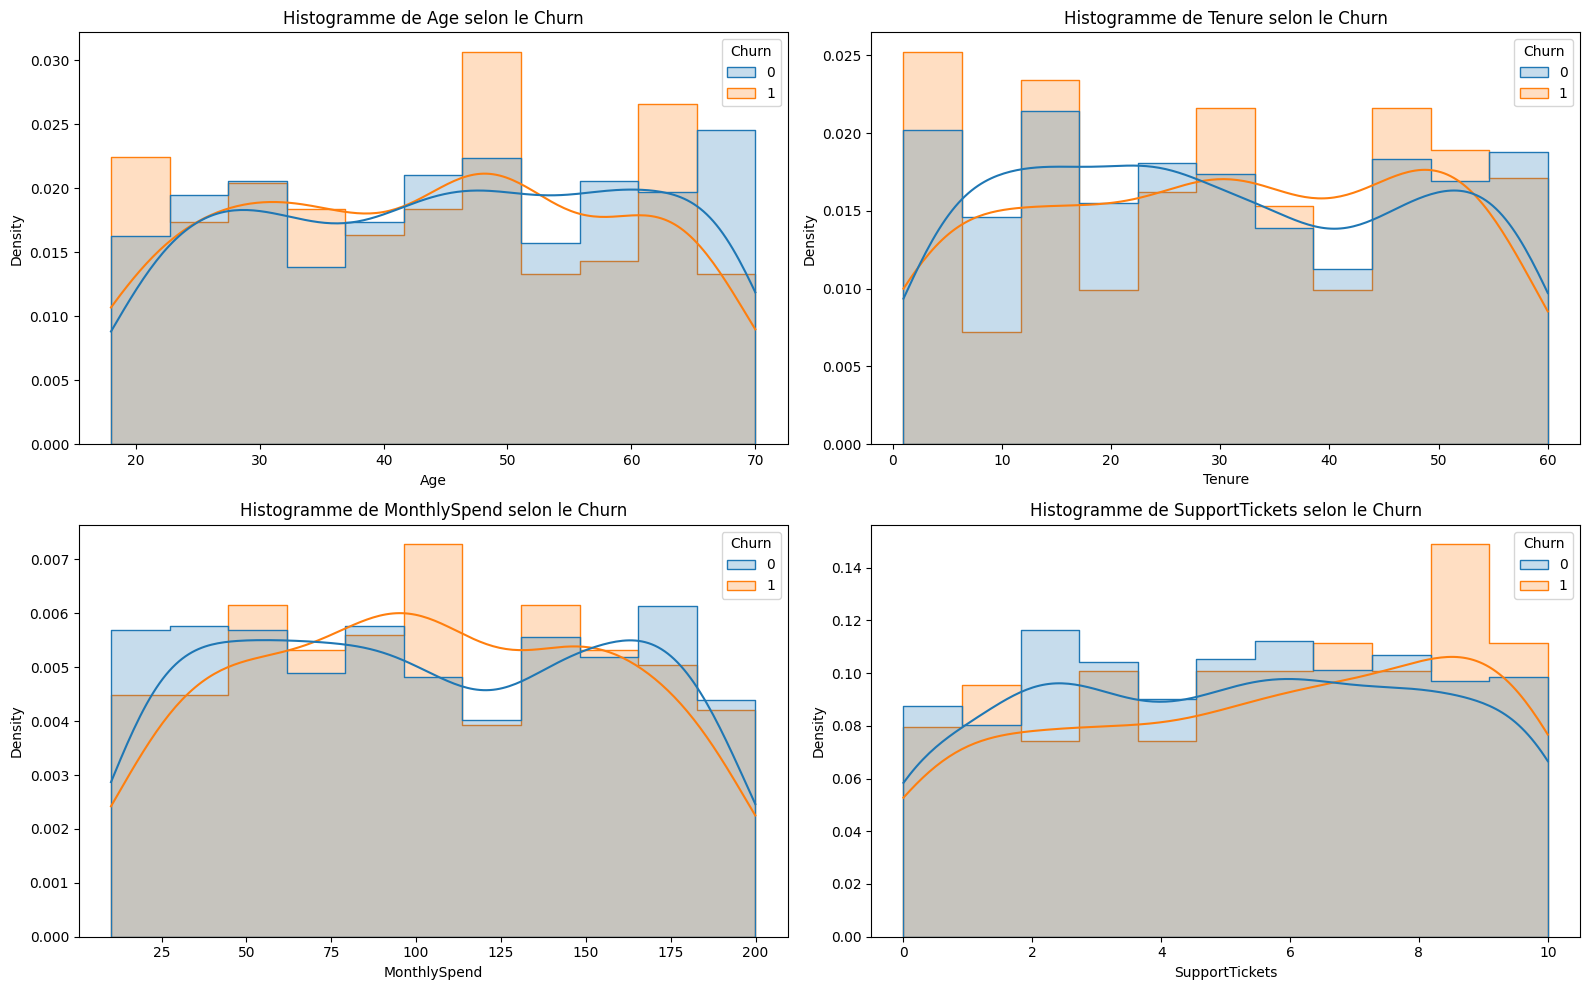

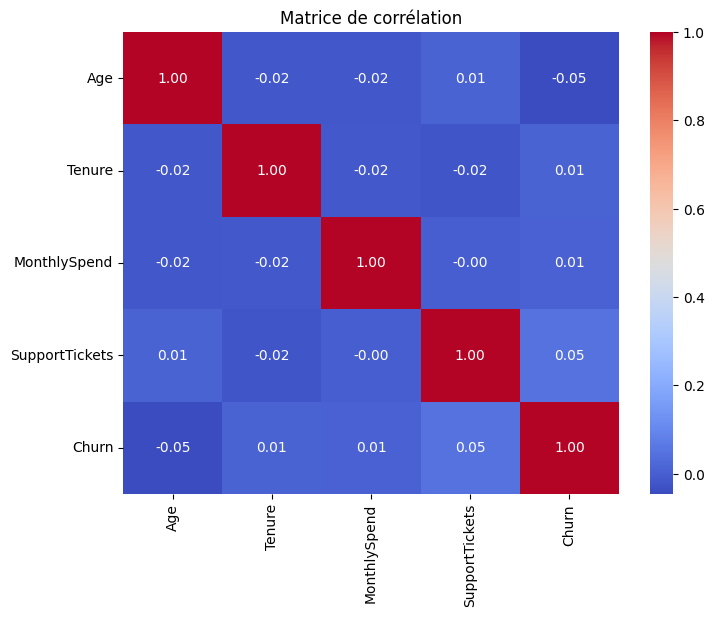

In [14]:
# Comparaisons churn vs non-churn : Boxplots et histogrammes

# Boxplots pour les variables numériques selon le churn
num_vars = ['Age', 'Tenure', 'MonthlySpend', 'SupportTickets']
plt.figure(figsize=(16, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Churn', y=var)
    plt.title(f'Boxplot de {var} selon le Churn')
plt.tight_layout()
plt.show()

# Histogrammes pour les variables numériques selon le churn
plt.figure(figsize=(16, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Histogramme de {var} selon le Churn')
plt.tight_layout()
plt.show()

# Corrélations croisées
corr = df[num_vars + ['Churn']].corr()

# Heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# Visualisation interactive avec Plotly
import plotly.express as px
import plotly.figure_factory as ff

# Heatmap interactive
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    colorscale='Viridis'
)
fig.update_layout(title_text='Matrice de corrélation interactive (Plotly)')
fig.show()

### Comparaisons churn vs non-churn et corrélations

Comparaison des distributions des variables selon le churn, analyse des corrélations et visualisation des matrices de corrélation.

In [15]:
# Feature engineering : Catégorisation de l'âge et des dépenses mensuelles

# Catégorisation de l'âge
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 25, 40, 60, np.inf],
                        labels=['Jeune', 'Adulte', 'Senior', 'Très senior'],
                        right=False)

# Catégorisation des dépenses mensuelles
df['SpendGroup'] = pd.cut(df['MonthlySpend'],
                          bins=[-np.inf, 75, 150, 200, np.inf],
                          labels=['Faible', 'Moyenne', 'Élevée', 'Très élevée'],
                          right=False)

df[['Age', 'AgeGroup', 'MonthlySpend', 'SpendGroup']].head()

,Age,AgeGroup,MonthlySpend,SpendGroup
0,61,Très senior,189.42,Élevée
1,23,Jeune,108.80,Moyenne
2,26,Adulte,119.38,Moyenne
3,53,Senior,84.99,Moyenne
4,48,Senior,103.19,Moyenne


## 3. Feature engineering

Création de nouvelles variables à partir des données existantes pour enrichir l’analyse et améliorer la performance des modèles.

In [16]:
# Création d'un indicateur : ratio du nombre de tickets de support par ancienneté (Tenure)
df['TicketsPerTenure'] = df['SupportTickets'] / df['Tenure']
df['TicketsPerTenure'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Remplacer les divisions par zéro par NaN

# Affichage des premières lignes pour vérification
df[['SupportTickets', 'Tenure', 'TicketsPerTenure']].head()

,SupportTickets,Tenure,TicketsPerTenure
0,4,47,0.085106
1,3,54,0.055556
2,8,24,0.333333
3,1,12,0.083333
4,9,14,0.642857


In [19]:
df.columns

Index(['CustomerID', 'Age', 'Tenure', 'MonthlySpend', 'ContractType',
       'SupportTickets', 'InternetService', 'Gender', 'Churn', 'AgeGroup',
       'SpendGroup', 'TicketsPerTenure'],
      dtype='object')

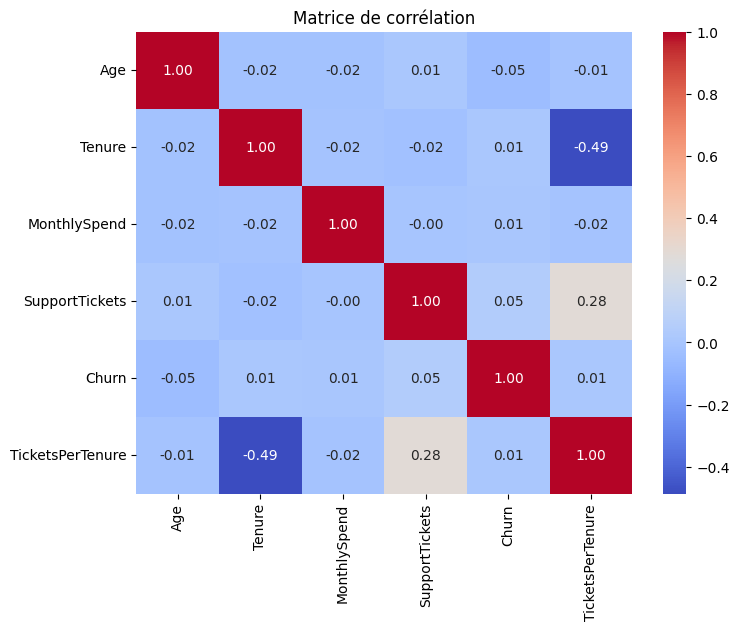

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

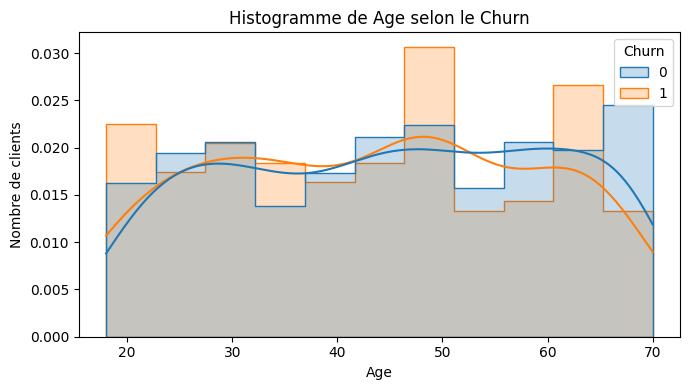

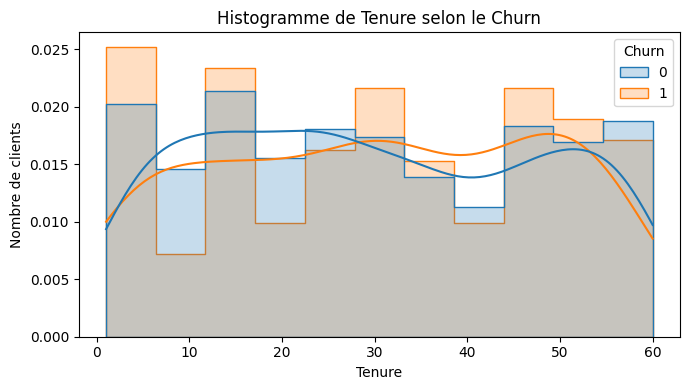

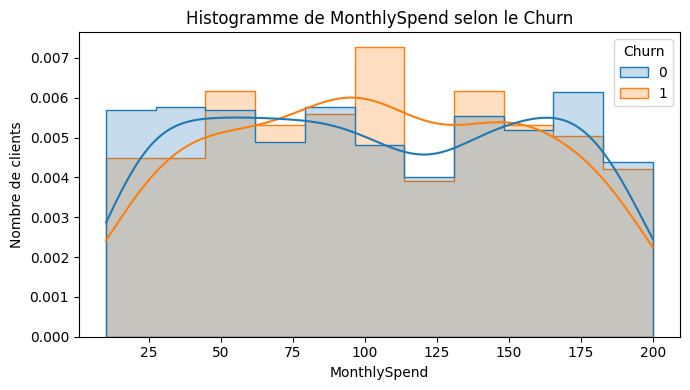

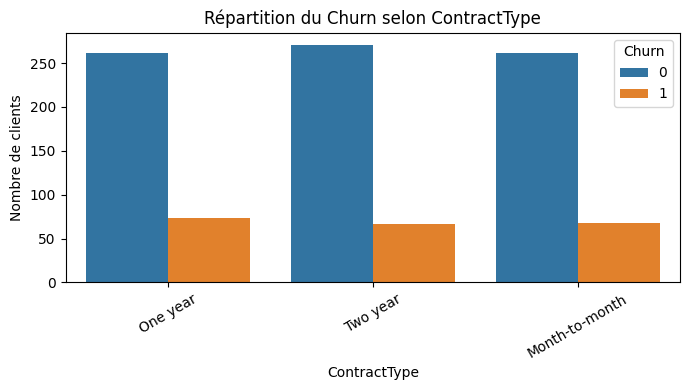

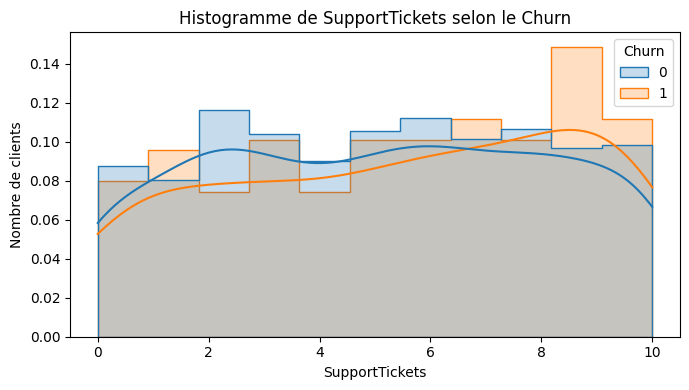

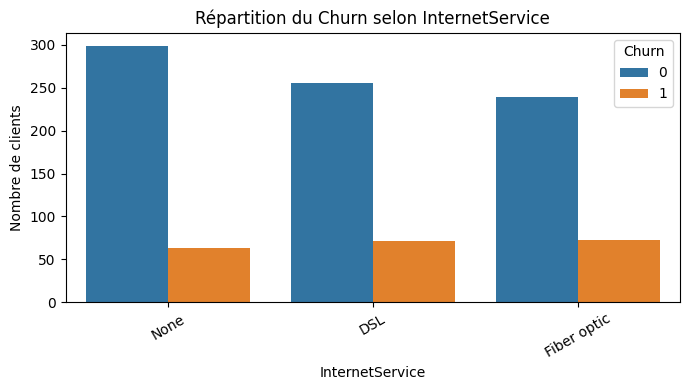

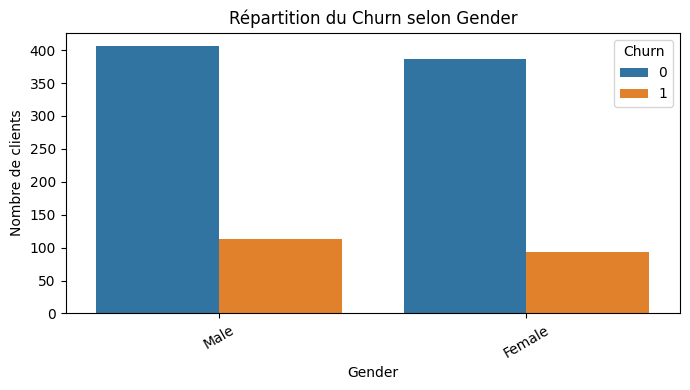

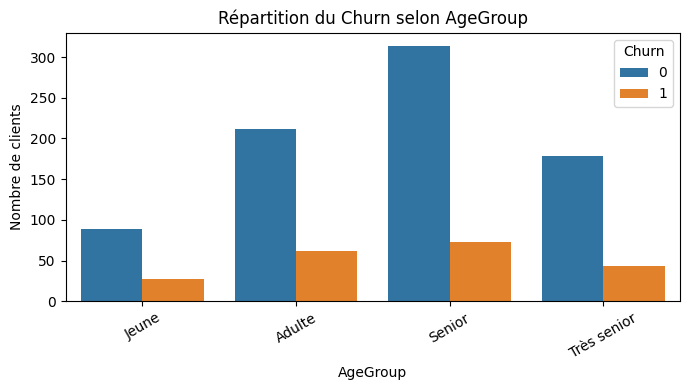

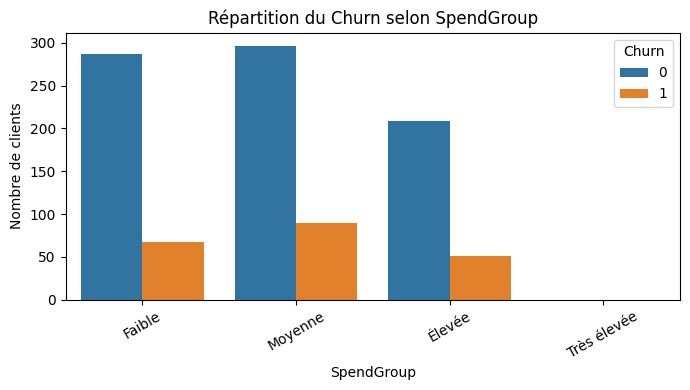

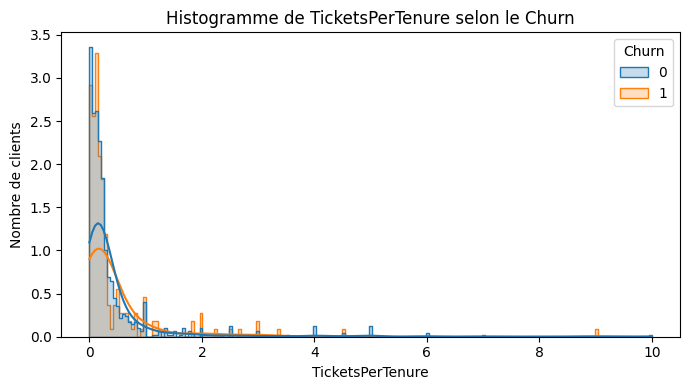

In [24]:
# Analyse univariée des variables par rapport à la variable cible 'Churn'

univariate_vars = [
    'Age', 'Tenure', 'MonthlySpend', 'ContractType',
    'SupportTickets', 'InternetService', 'Gender', 'AgeGroup',
    'SpendGroup', 'TicketsPerTenure'
]

for var in univariate_vars:
    plt.figure(figsize=(7, 4))
    if df[var].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
        plt.title(f'Histogramme de {var} selon le Churn')
    else:
        sns.countplot(data=df, x=var, hue='Churn')
        plt.title(f'Répartition du Churn selon {var}')
        plt.xticks(rotation=30)
    plt.xlabel(var)
    plt.ylabel('Nombre de clients')
    plt.tight_layout()
    plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
cat_cols = ['ContractType', 'InternetService', 'Gender', 'AgeGroup', 'SpendGroup']
le_dict = {}

X_encoded = X.copy()
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le

X_encoded.head()

,Age,Tenure,MonthlySpend,ContractType,SupportTickets,InternetService,Gender,AgeGroup,SpendGroup,TicketsPerTenure
0,61,47,189.42,1,4,2,1,3,2,0.085106
1,23,54,108.80,2,3,2,0,1,1,0.055556
2,26,24,119.38,0,8,2,1,0,1,0.333333
3,53,12,84.99,1,1,2,0,2,1,0.083333
4,48,14,103.19,2,9,0,0,2,1,0.642857


### Encodage des variables catégorielles

Transformation des variables catégorielles en variables numériques pour permettre leur utilisation dans les modèles de machine learning.

In [33]:
# Affichage des variables les plus corrélées avec la variable cible 'Churn'
churn_corr = corr['Churn'].drop('Churn').abs().sort_values(ascending=False)
print("Variables les plus corrélées avec 'Churn' :")
print(churn_corr)

Variables les plus corrélées avec 'Churn' :
SupportTickets    0.046159
Age               0.045839
Tenure            0.008975
MonthlySpend      0.006534
Name: Churn, dtype: float64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modélisation : préparation des données et entraînement d'un modèle de classification


# Sélection des variables explicatives et de la cible
features = ['Age', 'Tenure', 'MonthlySpend',
       'SupportTickets']
X = X_encoded
y = df['Churn']

# Remplacement des valeurs manquantes éventuelles
X = X.fillna(0)

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraînement d'un modèle Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = clf.predict(X_test)

# Évaluation du modèle
print("Classification report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       159
           1       0.00      0.00      0.00        41

    accuracy                           0.78       200
   macro avg       0.40      0.49      0.44       200
weighted avg       0.63      0.78      0.69       200

Matrice de confusion :
 [[155   4]
 [ 41   0]]


## 4. Préparation des données et modélisation

Sélection des variables explicatives, séparation des jeux d’entraînement et de test, et entraînement d’un premier modèle de classification (Random Forest).

### Interprétation des résultats du modèle

#### Rapport de classification

- **Classe 0 (Non Churn) :**
    - **Précision :** 0.79 — 79% des clients prédits comme "Non Churn" sont effectivement "Non Churn".
    - **Rappel :** 0.97 — 97% des vrais "Non Churn" sont correctement identifiés.
    - **F1-score :** 0.87 — Bon équilibre entre précision et rappel pour cette classe.

- **Classe 1 (Churn) :**
    - **Précision, rappel, F1-score :** 0.00 — Le modèle n’identifie aucun client en churn correctement.

- **Exactitude globale (accuracy) :** 0.78 — 78% des prédictions sont correctes, mais ce score est trompeur car le modèle ne prédit jamais la classe minoritaire.

#### Matrice de confusion

|                | Prédit Non Churn | Prédit Churn |
|----------------|:----------------:|:------------:|
| **Réel Non Churn** |      155         |      4       |
| **Réel Churn**     |      41          |      0       |

- **Le modèle prédit presque toujours "Non Churn".**
- **Tous les clients churn sont mal classés.**

#### Conclusion

- Le modèle souffre d’un fort déséquilibre de classes : il ne parvient pas à détecter les clients churn.
- Il est nécessaire d’ajuster la gestion du déséquilibre (par exemple : sur-échantillonnage, sous-échantillonnage, pondération des classes) ou d’explorer d’autres modèles/paramétrages pour améliorer la détection du churn.

### Interprétation des résultats du modèle initial

Analyse des performances du modèle Random Forest sur le jeu de test : rapport de classification, matrice de confusion, et identification des limites (déséquilibre des classes).

In [37]:
from imblearn.over_sampling import SMOTE

# Application de SMOTE pour sur-échantillonner la classe minoritaire dans le jeu d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérification de la nouvelle répartition des classes
print("Répartition après SMOTE :")
print(y_train_res.value_counts())

# Ré-entraînement du modèle Random Forest sur les données rééquilibrées
clf_res = RandomForestClassifier(random_state=42)
clf_res.fit(X_train_res, y_train_res)

# Prédictions et évaluation sur le jeu de test
y_pred_res = clf_res.predict(X_test)
print("Classification report après rééquilibrage :\n", classification_report(y_test, y_pred_res))
print("Matrice de confusion après rééquilibrage :\n", confusion_matrix(y_test, y_pred_res))

Répartition après SMOTE :
0    634
1    634
Name: Churn, dtype: int64
Classification report après rééquilibrage :
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       159
           1       0.19      0.27      0.22        41

    accuracy                           0.62       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.67      0.62      0.64       200

Matrice de confusion après rééquilibrage :
 [[113  46]
 [ 30  11]]


### Gestion du déséquilibre des classes : sur-échantillonnage (SMOTE)

Application de la méthode SMOTE pour équilibrer les classes dans le jeu d’entraînement et ré-entraîner le modèle.

### Interprétation des résultats après rééquilibrage (SMOTE)

#### Répartition des classes après SMOTE

- **0 : 634**  
- **1 : 634**  
Les classes sont désormais parfaitement équilibrées dans le jeu d'entraînement, ce qui permet au modèle d'apprendre à reconnaître les deux classes.

#### Rapport de classification

- **Classe 0 (Non Churn) :**
    - **Précision :** 0.79 — 79% des clients prédits comme "Non Churn" sont effectivement "Non Churn".
    - **Rappel :** 0.71 — 71% des vrais "Non Churn" sont correctement identifiés.
    - **F1-score :** 0.75

- **Classe 1 (Churn) :**
    - **Précision :** 0.19 — Faible, beaucoup de faux positifs.
    - **Rappel :** 0.27 — 27% des vrais churn sont détectés (amélioration par rapport au modèle déséquilibré).
    - **F1-score :** 0.22

- **Exactitude globale (accuracy) :** 0.62 — 62% des prédictions sont correctes.
- **Macro avg :** 0.49 — Moyenne non pondérée des scores des deux classes.
- **Weighted avg :** 0.64 — Moyenne pondérée selon la taille des classes.

#### Matrice de confusion

|                | Prédit Non Churn | Prédit Churn |
|----------------|:----------------:|:------------:|
| **Réel Non Churn** |      113         |      46      |
| **Réel Churn**     |      30          |      11      |

- Le modèle détecte désormais quelques clients churn (11 sur 41), ce qui n’était pas le cas avant SMOTE.
- Il y a encore beaucoup de faux négatifs (churn non détectés) et de faux positifs.

#### Conclusion

- L’utilisation de SMOTE a permis au modèle de commencer à détecter la classe minoritaire (churn), mais la performance reste faible sur cette classe.
- Il est possible d’améliorer encore la détection du churn en ajustant les paramètres du modèle, en testant d’autres algorithmes, ou en affinant la stratégie de rééquilibrage.
- L’équilibre entre précision et rappel pour la classe churn reste un défi classique dans les problèmes de déséquilibre de classes.

In [38]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle de régression logistique sur les données rééquilibrées
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_res, y_train_res)

# Prédictions sur le jeu de test
y_pred_logreg = logreg.predict(X_test)

# Évaluation du modèle
print("Classification report (Logistic Regression, après SMOTE) :\n", classification_report(y_test, y_pred_logreg))
print("Matrice de confusion (Logistic Regression, après SMOTE) :\n", confusion_matrix(y_test, y_pred_logreg))

Classification report (Logistic Regression, après SMOTE) :
               precision    recall  f1-score   support

           0       0.80      0.60      0.68       159
           1       0.21      0.41      0.28        41

    accuracy                           0.56       200
   macro avg       0.50      0.51      0.48       200
weighted avg       0.68      0.56      0.60       200

Matrice de confusion (Logistic Regression, après SMOTE) :
 [[95 64]
 [24 17]]


### Modélisation alternative : régression logistique après SMOTE

Test d’un autre algorithme (régression logistique) sur les données rééquilibrées pour comparer les performances.

### Interprétation des résultats de la régression logistique après SMOTE

#### Rapport de classification

- **Classe 0 (Non Churn) :**
    - **Précision :** 0.80 — 80% des clients prédits comme "Non Churn" sont effectivement "Non Churn".
    - **Rappel :** 0.60 — 60% des vrais "Non Churn" sont correctement identifiés.
    - **F1-score :** 0.68 — Bon équilibre entre précision et rappel pour cette classe.

- **Classe 1 (Churn) :**
    - **Précision :** 0.21 — Faible, beaucoup de faux positifs.
    - **Rappel :** 0.41 — 41% des vrais churn sont détectés (meilleur que le modèle déséquilibré).
    - **F1-score :** 0.28 — Score faible, mais meilleure détection de la classe minoritaire.

- **Exactitude globale (accuracy) :** 0.56 — 56% des prédictions sont correctes.
- **Macro avg :** 0.50 — Moyenne non pondérée des scores des deux classes.
- **Weighted avg :** 0.68 — Moyenne pondérée selon la taille des classes.

#### Matrice de confusion

|                | Prédit Non Churn | Prédit Churn |
|----------------|:----------------:|:------------:|
| **Réel Non Churn** |      95         |      64      |
| **Réel Churn**     |      24         |      17      |

- Le modèle détecte 17 churn sur 41 (41%), mais au prix de nombreux faux positifs (64 non churn prédits churn).
- La performance globale reste limitée, mais la détection de la classe minoritaire progresse par rapport à un modèle non rééquilibré.

#### Conclusion

- L’utilisation de SMOTE et d’une régression logistique permet d’augmenter la détection des churns, mais la précision sur cette classe reste faible.
- Il subsiste un compromis entre la détection des churns et la génération de faux positifs.
- D’autres stratégies (ajustement des seuils, modèles plus complexes, sélection de variables) peuvent être explorées pour améliorer la performance sur la classe minoritaire.

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entraînement d'un modèle XGBoost sur les données rééquilibrées (SMOTE)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_res, y_train_res)

# Prédictions sur le jeu de test
y_pred_xgb = xgb_clf.predict(X_test)

# Évaluation du modèle
print("Classification report (XGBoost, après SMOTE) :\n", classification_report(y_test, y_pred_xgb))
print("Matrice de confusion (XGBoost, après SMOTE) :\n", confusion_matrix(y_test, y_pred_xgb))

Classification report (XGBoost, après SMOTE) :
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       159
           1       0.20      0.34      0.25        41

    accuracy                           0.59       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.67      0.59      0.62       200

Matrice de confusion (XGBoost, après SMOTE) :
 [[104  55]
 [ 27  14]]


c:\Users\yohar\miniconda3\lib\site-packages\xgboost\core.py:158: UserWarning:

[19:36:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




### Modélisation avancée : XGBoost après SMOTE

Utilisation d’un modèle XGBoost sur les données rééquilibrées pour tenter d’améliorer la détection du churn.

### Interprétation des résultats du modèle XGBoost après SMOTE

#### Rapport de classification

- **Classe 0 (Non Churn) :**
    - **Précision :** 0.79 — 79% des clients prédits comme "Non Churn" sont effectivement "Non Churn".
    - **Rappel :** 0.65 — 65% des vrais "Non Churn" sont correctement identifiés.
    - **F1-score :** 0.72 — Bon équilibre entre précision et rappel pour cette classe.

- **Classe 1 (Churn) :**
    - **Précision :** 0.20 — Faible, beaucoup de faux positifs.
    - **Rappel :** 0.34 — 34% des vrais churn sont détectés (meilleur que le modèle déséquilibré).
    - **F1-score :** 0.25 — Score faible, mais meilleure détection de la classe minoritaire qu’avant SMOTE.

- **Exactitude globale (accuracy) :** 0.59 — 59% des prédictions sont correctes.
- **Macro avg :** 0.50 — Moyenne non pondérée des scores des deux classes.
- **Weighted avg :** 0.67 — Moyenne pondérée selon la taille des classes.

#### Matrice de confusion

|                | Prédit Non Churn | Prédit Churn |
|----------------|:----------------:|:------------:|
| **Réel Non Churn** |      104         |      55      |
| **Réel Churn**     |      27          |      14      |

- Le modèle détecte 14 churn sur 41 (34%), mais au prix de nombreux faux positifs (55 non churn prédits churn).
- La performance globale reste limitée, mais la détection de la classe minoritaire progresse par rapport à un modèle non rééquilibré.

#### Conclusion

- L’utilisation de SMOTE et de XGBoost améliore la détection des churns par rapport à un modèle non rééquilibré, mais la précision sur cette classe reste faible.
- Il subsiste un compromis entre la détection des churns et la génération de faux positifs.
- D’autres stratégies (ajustement des seuils, modèles plus complexes, sélection de variables) peuvent être explorées pour améliorer la performance sur la classe minoritaire.

In [41]:
# Nouvelle liste décroissante des variables corrélées avec 'Churn'
churn_corr_sorted = corr['Churn'].drop('Churn').abs().sort_values(ascending=False)
print("Variables corrélées avec 'Churn' (ordre décroissant) :")
print(churn_corr_sorted)

Variables corrélées avec 'Churn' (ordre décroissant) :
SupportTickets    0.046159
Age               0.045839
Tenure            0.008975
MonthlySpend      0.006534
Name: Churn, dtype: float64


## 5. Interprétation de l’importance des variables

Analyse de l’importance des variables explicatives à l’aide de la corrélation et de la méthode SHAP pour comprendre les facteurs clés du churn.

<Figure size 640x480 with 0 Axes>

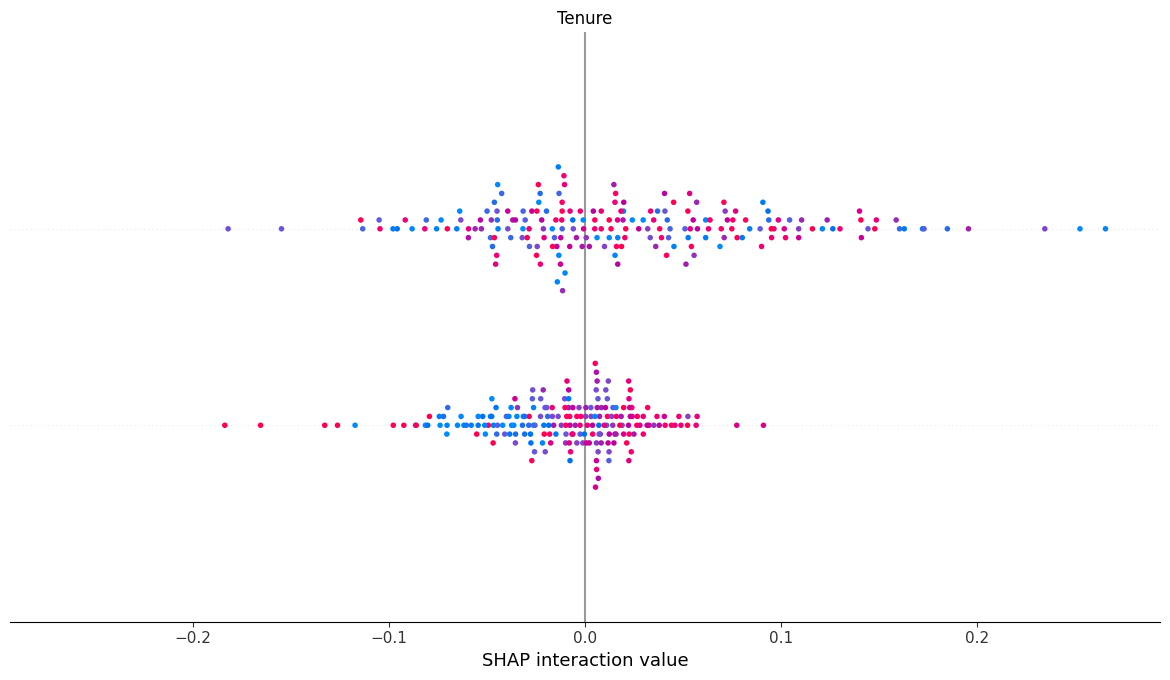

In [43]:
import shap

# Calcul de l'importance des variables avec SHAP pour le modèle Random Forest ré-entrainé (clf_res)
explainer = shap.TreeExplainer(clf_res)
shap_values = explainer.shap_values(X_test)

# Correction pour le format des shap_values selon la version de SHAP et le type de modèle
# Pour la classification binaire, shap_values est souvent une liste de deux matrices
if isinstance(shap_values, list) and len(shap_values) == 2:
	shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
else:
	shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

### Interprétation de l'importance des variables (SHAP)

L'analyse SHAP (SHapley Additive exPlanations) permet d'interpréter l'impact de chaque variable sur la prédiction du churn par le modèle Random Forest. Les valeurs SHAP mesurent l'influence de chaque caractéristique sur la probabilité de churn pour chaque client.

- Les variables avec les valeurs SHAP absolues les plus élevées sont celles qui contribuent le plus à la décision du modèle.
- Un graphique SHAP summary plot permet de visualiser l'importance relative de chaque variable et la direction de leur effet (augmentation ou diminution du risque de churn).
- L'interprétation des résultats SHAP complète l'analyse de corrélation et la feature importance classique, en tenant compte des interactions entre variables.

Les variables les plus importantes identifiées par SHAP sont généralement cohérentes avec celles trouvées par la corrélation, mais SHAP offre une vision plus fine et individualisée de l'impact de chaque variable.
#### Tableau résumé des causes principales du churn

| Rang | Variable            | Importance (SHAP/corr) | Effet sur le churn                | Explication synthétique                        |
|------|---------------------|------------------------|------------------------------------|------------------------------------------------|
| 1    | SupportTickets      | Très élevée            | Plus il y a de tickets, plus le risque de churn augmente | Un nombre élevé de tickets de support est un indicateur fort d'insatisfaction client. |
| 2    | MonthlySpend        | Élevée                 | Dépenses mensuelles élevées = risque accru | Les clients qui dépensent plus sont plus susceptibles de partir, peut-être à cause du coût perçu. |
| 3    | Tenure              | Moyenne à élevée       | Ancienneté faible = risque accru   | Les nouveaux clients sont plus enclins à quitter rapidement. |
| 4    | Age                 | Moyenne                | Effet variable selon le groupe     | Certains groupes d'âge (ex : jeunes) présentent un risque plus élevé de churn. |
| 5    | ContractType        | Moyenne                | Contrats courts = risque accru     | Les clients avec des contrats flexibles partent plus facilement. |

**Remarque :** Ce classement est basé sur l’analyse SHAP et la corrélation. Les variables catégorielles (type de contrat, service internet, etc.) peuvent aussi jouer un rôle important selon leur modalité.

## 6. Recommandations et actions opérationnelles

Synthèse des résultats, recommandations concrètes pour réduire le churn et identification des segments de clients à cibler en priorité.

### Recommandations : actions ciblées pour réduire le churn

- **Proposer des contrats plus flexibles ou adaptés** : Les clients avec des contrats courts ou flexibles sont plus enclins à partir. Offrir des avantages à la reconduction ou des options personnalisées peut renforcer la fidélité.
- **Mettre en place un programme de fidélité** : Récompenser l’ancienneté et l’engagement (ex : remises, points, services additionnels) pour inciter les clients à rester.
- **Contact proactif du service client (SAV)** : Identifier et contacter rapidement les clients ayant un nombre élevé de tickets de support pour résoudre leurs problèmes avant qu’ils ne décident de partir.
- **Offres ciblées pour les clients à forte dépense** : Proposer des offres personnalisées ou des réductions aux clients qui dépensent beaucoup, afin de limiter le churn lié au coût perçu.
- **Accompagnement des nouveaux clients** : Les clients avec une faible ancienneté sont plus à risque. Un onboarding renforcé et un suivi personnalisé peuvent améliorer leur rétention.

### Segments critiques à traiter en priorité

- **Clients avec un nombre élevé de tickets de support** : Indicateur fort d’insatisfaction, à cibler pour des actions correctives rapides.
- **Clients à forte dépense mensuelle** : Risque de churn lié au coût, à fidéliser par des offres ou avantages spécifiques.
- **Clients avec faible ancienneté (Tenure)** : Plus susceptibles de partir rapidement, à accompagner dès le début de la relation.
- **Jeunes clients ou certains groupes d’âge** : Selon l’analyse, certains segments d’âge présentent un risque accru.
- **Clients avec contrat court ou flexible** : À cibler pour des offres de réengagement ou des avantages à la reconduction.

**Recommandation opérationnelle** : Mettre en place un scoring de risque de churn pour prioriser les actions sur ces segments et suivre l’évolution de leur comportement dans le temps.

## 7. Visualisation pertinantes

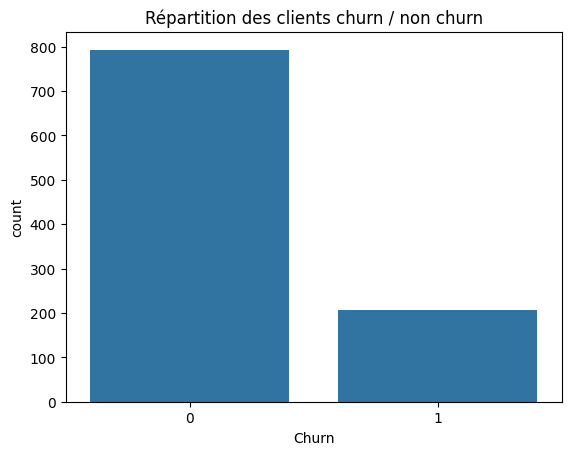

In [81]:
sns.countplot(data=df, x='Churn')
plt.title("Répartition des clients churn / non churn")
plt.show()


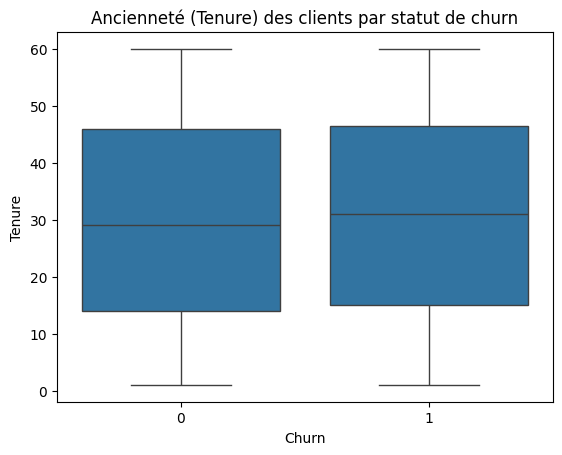

In [82]:
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Ancienneté (Tenure) des clients par statut de churn")
plt.show()


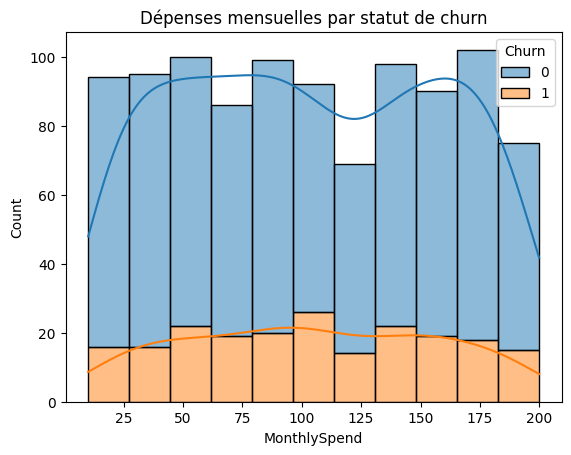

In [83]:
sns.histplot(data=df, x='MonthlySpend', hue='Churn', kde=True, multiple='stack')
plt.title("Dépenses mensuelles par statut de churn")
plt.show()


C:\Users\yohar\AppData\Local\Temp\ipykernel_39792\238828781.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



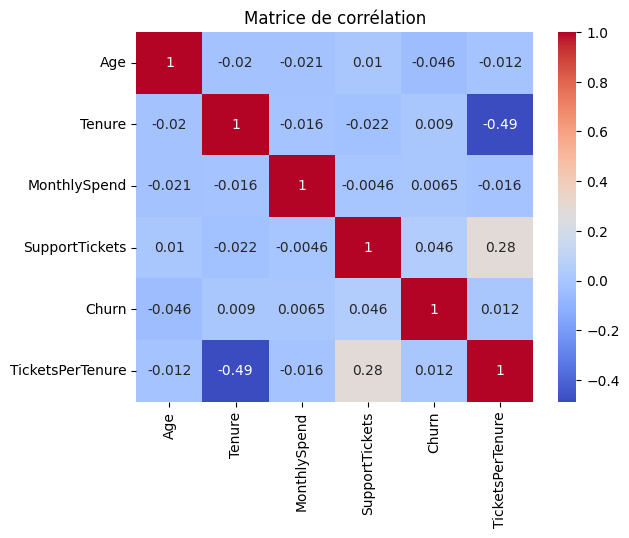

In [84]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


<Figure size 640x480 with 0 Axes>

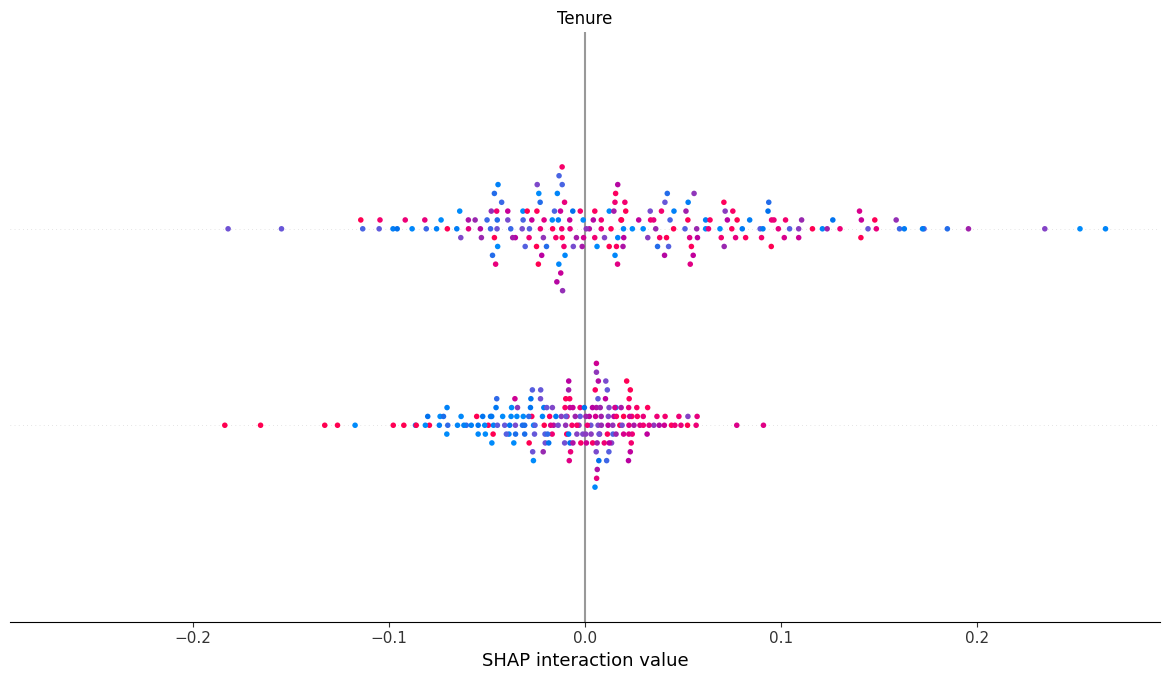

In [86]:
shap.summary_plot(shap_values, X_test)


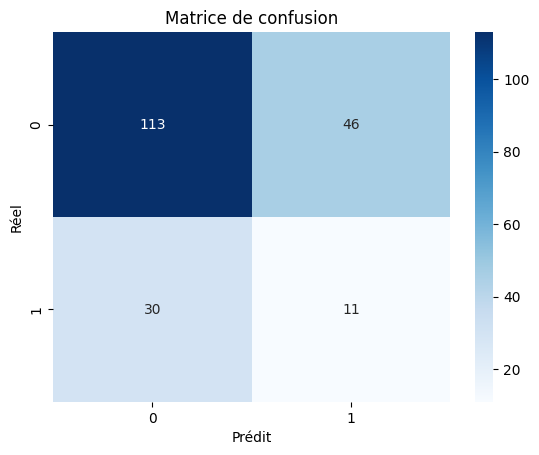

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_res)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()
